### ANN para XOR
### Juan Pablo Fonseca 138263

In [98]:
import tensorflow as tf # importamos librerias
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [100]:
# variables
X = np.asarray([[0,0],[0,1],[1,0],[1,1]])
Y = np.asarray([[0],[1],[1],[0]])
input_size = 2
middle_layer = 2
hidden_layers = 2
output_size = 1

x = tf.placeholder(tf.float32,shape=[None,input_size])
y_ = tf.placeholder(tf.float32,shape=[None,output_size])

In [103]:
W_layer1= tf.Variable(tf.random_uniform([input_size,middle_layer], -1, 1), name="W_layer1")
b_layer1= tf.Variable(tf.zeros([middle_layer]), name="b_layer1")
W_layer2= tf.Variable(tf.random_uniform([hidden_layers,output_size], -1, 1), name="W_layer2")
b_layer2= tf.Variable(tf.zeros([output_size]), name="b_layer2")

In [104]:
hidden_1=tf.nn.sigmoid(tf.matmul(x,W_layer1)+b_layer1)
y= tf.nn.sigmoid(tf.matmul(hidden_1,W_layer2)+b_layer2) 
lossfn = tf.reduce_mean(tf.reduce_sum((y_-y)**2)) 
train_step = tf.train.GradientDescentOptimizer(0.01).minimize(lossfn)
init = tf.global_variables_initializer()
sess = tf.Session()

In [106]:
sess.run(init)
for i in range(30000):
  sess.run(train_step, feed_dict={x: X, y_: Y})
print(sess.run(y, feed_dict={x:[[0.8,0.5]]}))
print(sess.run(W_layer1, feed_dict={x: X, y_: Y}))

[[ 0.74673152]]
[[ 3.12172151 -5.43730211]
 [ 3.09697223 -5.24757338]]


### Error

In [107]:
predCorrecta = tf.equal(tf.round(y),y_)
accuracy = tf.reduce_mean(tf.cast(predCorrecta, tf.float32))
print(sess.run(accuracy, feed_dict={x: X, y_: Y}))

1.0


In [116]:
w1=[sess.run(b_layer1, feed_dict={x: X, y_: Y})[1]]+[i[0] for i in sess.run(W_layer1, feed_dict={x: X, y_: Y})]
w2=[sess.run(b_layer2, feed_dict={x: X, y_: Y})]+[i[0] for i in sess.run(W_layer2, feed_dict={x: X, y_: Y})]
m1=((w1[0]/w1[2]))/((-w1[0]/w1[1]))
m2=((w2[0]/w2[2]))/((-w2[0]/w2[1]))

(-0.5, 1.5)

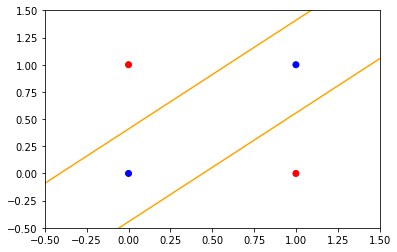

In [118]:
# graficarlo
plt.scatter(X[:,0],X[:,1],c=['red' if i==1 else 'blue' for i in Y])
x2 = np.linspace(-0.5,1.5,100)
plt.plot(x2,-w1[0]/w1[2]+m1*x2,color='orange')
plt.plot(x2,-w2[0]/w2[2]+m2*x2,color='orange')
plt.ylim([-0.5,1.5])
plt.xlim([-0.5,1.5])

In [119]:
sess.close()